In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os
from scipy.stats import linregress

In [5]:
#Combining all datasets for 
path = '../Data/Natural Disaster Data'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

#Create a dataframe based on multiple csvs
natural_disasters_df = pd.concat(li, axis=0, ignore_index=True)
natural_disasters_df.head()

,version https://git-lfs.github.com/spec/v1
0,oid sha256:911d1e68b4ea4816e7c1cfc2d478ffb870a...
1,size 54747
2,oid sha256:823a2b226721729a2463b88512d8754a248...
3,size 64886
4,oid sha256:a80771b7940747c20b15622eaa5d81adf3f...


In [ ]:
#Cleaning the Dataframe created above
natural_disasters_df = natural_disasters_df.drop(columns =['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY','END_TIME','EPISODE_ID','STATE_FIPS','CZ_TYPE','CZ_FIPS','CZ_NAME','WFO','BEGIN_DATE_TIME','CZ_TIMEZONE','END_DATE_TIME','SOURCE','MAGNITUDE_TYPE','FLOOD_CAUSE','CATEGORY','TOR_F_SCALE','TOR_LENGTH','TOR_WIDTH','TOR_OTHER_WFO','TOR_OTHER_CZ_STATE','TOR_OTHER_CZ_FIPS','TOR_OTHER_CZ_NAME','BEGIN_RANGE','BEGIN_AZIMUTH','BEGIN_LOCATION','END_RANGE','END_AZIMUTH','END_LOCATION','BEGIN_LAT','BEGIN_LON','END_LAT','END_LON','EPISODE_NARRATIVE','EVENT_NARRATIVE'])

In [ ]:
# Check to see if there are any rows with missing data
natural_disasters_df['DAMAGE_CROPS'] = natural_disasters_df['DAMAGE_CROPS'].fillna(0)
natural_disasters_df['DAMAGE_PROPERTY'] = natural_disasters_df['DAMAGE_PROPERTY'].fillna(0)

In [ ]:
#This cleans the financial impact data and allows us to preform calculations

#Take the K M B identifiers off of DAMAGE_PROPERTY
natural_disasters_df["property_money_identifier"] = natural_disasters_df.DAMAGE_PROPERTY.str.extract(r'[\d\.]+([KkMBHhT]+)', expand=False)
natural_disasters_df['DAMAGE_PROPERTY'] = natural_disasters_df['DAMAGE_PROPERTY'].str.replace(r'[KkMBHhT?]+$','', regex=True)

#Take the K M B identifiers off of DAMAGE_CROPS
natural_disasters_df['crops_money_identifier'] = natural_disasters_df.DAMAGE_CROPS.str.extract(r'[\d\.]+([KkMBHhT]+)', expand=False)
natural_disasters_df['DAMAGE_CROPS'] = natural_disasters_df['DAMAGE_CROPS'].str.replace(r'[KkMBHh?T]+$','', regex=True)

#Replace K M and B with values in money_identifier with the values in the property_money_identifier column
natural_disasters_df['property_money_identifier'] = natural_disasters_df['property_money_identifier'].str.replace(r'[Kk]+$','1000', regex=True)
natural_disasters_df['property_money_identifier'] = natural_disasters_df['property_money_identifier'].str.replace(r'[M]+$','1000000', regex=True)
natural_disasters_df['property_money_identifier'] = natural_disasters_df['property_money_identifier'].str.replace(r'[B]+$','1000000000', regex=True)
natural_disasters_df['property_money_identifier'] = natural_disasters_df['property_money_identifier'].str.replace(r'[T]+$','1000000000000', regex=True)
natural_disasters_df['property_money_identifier'] = natural_disasters_df['property_money_identifier'].str.replace(r'[hH?]+$','1', regex=True)
natural_disasters_df['property_money_identifier'] = natural_disasters_df['property_money_identifier'].fillna(1)

#Replace K M and B with values in money_identifier with the values in the property_money_identifier column
natural_disasters_df['crops_money_identifier'] = natural_disasters_df['crops_money_identifier'].str.replace(r'[Kk]+$','1000', regex=True)
natural_disasters_df['crops_money_identifier'] = natural_disasters_df['crops_money_identifier'].str.replace(r'[M]+$','1000000', regex=True)
natural_disasters_df['crops_money_identifier'] = natural_disasters_df['crops_money_identifier'].str.replace(r'[B]+$','1000000000', regex=True)
natural_disasters_df['crops_money_identifier'] = natural_disasters_df['crops_money_identifier'].str.replace(r'[T]+$','1000000000000', regex=True)
natural_disasters_df['crops_money_identifier'] = natural_disasters_df['crops_money_identifier'].str.replace(r'[hH?]+$','1', regex=True)
natural_disasters_df['crops_money_identifier'] = natural_disasters_df['crops_money_identifier'].fillna(1)

In [ ]:
# Replace any '' with a zero
natural_disasters_df['DAMAGE_CROPS'] = natural_disasters_df['DAMAGE_CROPS'].fillna(0)
natural_disasters_df['DAMAGE_PROPERTY'] = natural_disasters_df['DAMAGE_PROPERTY'].fillna(0)

# Convert DAMAGE_PROPERTY & DAMAGE_CROPS
natural_disasters_df['DAMAGE_PROPERTY'] = pd.to_numeric(natural_disasters_df['DAMAGE_PROPERTY'])
natural_disasters_df['DAMAGE_CROPS'] = pd.to_numeric(natural_disasters_df['DAMAGE_CROPS'])
natural_disasters_df['crops_money_identifier'] = pd.to_numeric(natural_disasters_df['crops_money_identifier'])
natural_disasters_df['property_money_identifier'] = pd.to_numeric(natural_disasters_df['property_money_identifier'])

# Multiply 'DAMAGE_PROPERTY' by 'property_money_identifier' & multiply 'DAMAGE_CROPS' by 'crops_money_identifier'
natural_disasters_df['DAMAGE_PROPERTY'] = natural_disasters_df['DAMAGE_PROPERTY'] * natural_disasters_df['property_money_identifier']
natural_disasters_df['DAMAGE_CROPS'] = natural_disasters_df['DAMAGE_CROPS'] * natural_disasters_df['crops_money_identifier']

In [ ]:
#Drop rows that have no monetary value for "DAMAGE_PROPERTY" or "DAMAGE_CROPS"
natural_disasters_df = natural_disasters_df.loc[(natural_disasters_df['DAMAGE_PROPERTY'] !=0) | (natural_disasters_df['DAMAGE_CROPS'] !=0)]
natural_disasters_df.head()

In [ ]:
natural_disasters_df.to_csv("../Data/natural_disasters.csv")

In [ ]:
#This ends beds Project1-BS file

In [ ]:
#This begins the JZwork file

In [ ]:
data = '../Data/natural_disasters.csv'
clean_df = pd.read_csv(data)
clean_df.head()

In [ ]:
year_df = clean_df.groupby('YEAR')
#year_df.head()
year_events = year_df['EVENT_TYPE'].count()
year_ttl_dmg = year_df['DAMAGE_PROPERTY'].sum()
year_ttl_dmg

In [ ]:
#This displays the number of Natural Disasters each year
event_chart = year_events.plot(kind='bar', title="Number of Events per year",)
plt.xticks(rotation=45)
plt.show()

In [ ]:
#This graph shows the amount of Natural disaster per category
ttl_dmg_chart = year_ttl_dmg.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#This graph shows the damage created each year
y_axis = year_df['DAMAGE_PROPERTY'].sum()
x_axis = year_df['YEAR'].unique()
plt.scatter(x_axis,y_axis)
plt.show()

In [ ]:
no_thunderstom_X = clean_df.replace({'THUNDERSTORM WINDS LIGHTNING':"Thunderstorm",'THUNDERSTORM WINDS/FLOODING':"Thunderstorm",'THUNDERSTORM WINDS/ FLOOD':"Thunderstorm",'Thunderstorm Wind':"Thunderstorm",'Marine Thunderstorm Wind':"Thunderstorm",'Lightning':"Thunderstorm",'Marine Hail': "Thunderstorm",'THUNDERSTORM WIND/ TREE ':"Thunderstorm"})
ttwh_df = clean_df.loc[clean_df['EVENT_TYPE'] == 'Tornado','Thunderstorm Wind','Hail']

In [ ]:
array = ['Tornado','Thunderstorm','Hail']
ttwh_df = no_thunderstom_X.loc[no_thunderstom_X['EVENT_TYPE'].isin(array)]
ninety_six_df = no_thunderstom_X.loc[no_thunderstom_X['EVENT_TYPE'].isin(array) == False]
ttwh_df.head()

In [ ]:
years_df = ttwh_df.groupby('YEAR')
#year_df.head()
years_events = years_df['EVENT_TYPE'].count()
years_ttl_dmg = years_df['DAMAGE_PROPERTY'].sum()
years_ttl_dmg

In [ ]:
#This creates a data file for Cost per Incident
CPI = '../Data/CPIdata1950-2020.csv'
CPI_df = pd.read_csv(CPI)
CPI_df.head()

In [ ]:
# This graphs damaged property each year
y_axis = years_df['DAMAGE_PROPERTY'].sum()
x_axis = ttwh_df['YEAR'].unique()
plt.scatter(x_axis,y_axis)
plt.show()

In [ ]:
ttwh_df['DAMAGE_PROPERTY'] =ttwh_df.apply(lambda x: cpi.inflate(x.DAMAGE_PROPERTY, x.YEAR), axis=1)
df.head()

In [ ]:
#This is the end of Jons JZwork file

In [ ]:
#This is the begging of the USemssions file

In [ ]:
emissions_data_path = "../Data/CO2Data.csv"
pop_data_path = "../Data/pop_data.csv"
emissions_df = pd.read_csv(emissions_data_path)
pop_df = pd.read_csv(pop_data_path)

In [ ]:
us_co2_series = emissions_df.loc[249]
us_co2_df = us_co2_series.to_frame()
us_clean_df = us_co2_df.drop(['Country Name', 'Country Code','Indicator Name','Indicator Code', '2017', '2018','2019'])
us_clean_df['Year'] = us_clean_df.index
us_em_df = us_clean_df.rename(columns={249:"Metric ton per Capita Emissions"})
us_em_df = us_em_df[['Year', 'Metric ton per Capita Emissions']]
us_em_df.head()

In [ ]:
us_emission_line = us_em_df.plot.line(legend=None)

In [ ]:
us_pop_line = pop_df.plot.line(x='Population by Millions', y='Year')

In [ ]:
merged_data = pop_df.merge(us_em_df)
merged_data.head()

In [ ]:
merged_data = merged_data.rename(columns={'Population by Millions':"pop", 'Metric ton per Capita Emissions':'emissions'})
merged_data.dtypes
merged_data['US Total Emmissions'] = merged_data['pop'] * merged_data['emissions']
merged_data.head()

In [ ]:
x = merged_data['Year']
y = merged_data['US Total Emmissions']
us_total_emissions_line = merged_data.plot.line(x='Year', y='US Total Emmissions')
plt.savefig("Images/UsEmissionsTrend.png")
plt.show()

In [ ]:
final_csv_location = "../Data/Year_CO2_Pop_data.csv"
merged_data.to_csv(final_csv_location)

In [ ]:
#This completed the USemissions file

In [ ]:
#This begins the inflation file

In [ ]:
CPI = '../Data/CPIdata1950-2020.csv'
CPI_df = pd.read_csv(CPI)
CPI_df.head()

In [ ]:
# create index multiplier
CPI_df['CPI_Multiplier'] = CPI_df['Annual'].iloc[-2] / CPI_df['Annual']

In [ ]:
clean_cpi = CPI_df.drop(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Annual','HALF1','HALF2'], axis=1)

In [ ]:
clean_cpi = clean_cpi.drop(index=70)

In [ ]:
clean_cpi.to_csv('clean_cpi.csv', index=False)

In [ ]:
#This completes the inflation file

In [1]:
#plotting by jz

In [26]:
file_to_load = '../data/ttwhadj.csv'
data = pd.read_csv(file_to_load)
data

,Unnamed: 0,Unnamed: 0.1,EVENT_ID,STATE,YEAR,MONTH_NAME,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,MAGNITUDE,DATA_SOURCE,property_money_identifier,crops_money_identifier,CPI_Multiplier,CPIAdjPrice,CROPADJ
0,0,0,10096222,OKLAHOMA,1950,April,Tornado,0,0,0,0,250000.0,0.0,0.0,PUB,1000,1,10.608174,2.652044e+06,0.0
1,1,1,10120412,TEXAS,1950,April,Tornado,0,0,0,0,25000.0,0.0,0.0,PUB,1000,1,10.608174,2.652044e+05,0.0
2,2,2,10104927,PENNSYLVANIA,1950,July,Tornado,2,0,0,0,25000.0,0.0,0.0,PUB,1000,1,10.608174,2.652044e+05,0.0
3,3,3,10104928,PENNSYLVANIA,1950,July,Tornado,0,0,0,0,2500.0,0.0,0.0,PUB,1000,1,10.608174,2.652044e+04,0.0
4,4,4,10104929,PENNSYLVANIA,1950,July,Tornado,0,0,0,0,2500.0,0.0,0.0,PUB,1000,1,10.608174,2.652044e+04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262573,380963,1602142,859300,CALIFORNIA,2019,September,Thunderstorm,0,0,0,0,0.0,2500000.0,43.0,CSV,1,1000,1.000000,0.000000e+00,2500000.0
262574,380965,1602163,851786,IOWA,2019,August,Thunderstorm,0,0,0,0,50000.0,0.0,61.0,CSV,1000,1,1.000000,5.000000e+04,0.0
262575,380966,1602164,851787,IOWA,2019,August,Thunderstorm,0,0,0,0,100000.0,0.0,74.0,CSV,1000,1,1.000000,1.000000e+05,0.0
262576,380967,1602168,855914,ARIZONA,2019,September,Thunderstorm,0,0,0,0,3000.0,0.0,60.0,CSV,1000,1000,1.000000,3.000000e+03,0.0


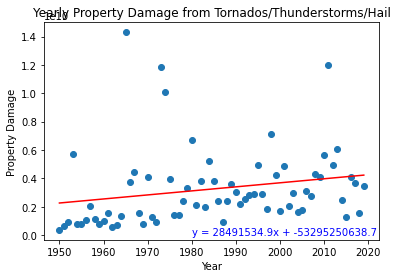

In [27]:
yearly_df = data.groupby('YEAR')
years =yearly_df['YEAR'].unique()
pdamage = yearly_df['CPIAdjPrice'].sum()
#cdamage = yearly_df.CROPADJ.array

plt.scatter(years, pdamage)
(slope, intercept, rvalue, pvalue, stderr) = linregress(years.astype(float), pdamage)
regress_values = years * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(1980,1),fontsize=10,color="blue")
#plt.plot(x_axis,regress_values,"r-")
plt.plot(years, intercept + slope*years, 'r', label='fitted line')

plt.xlabel("Year") 
plt.ylabel("Property Damage") 
plt.title("Yearly Property Damage from Tornados/Thunderstorms/Hail") 
plt.show()

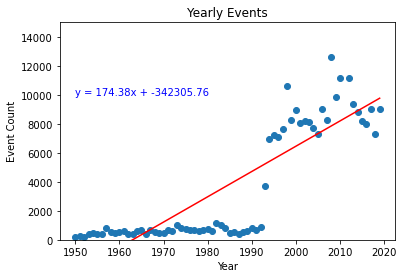

In [29]:
yearly_df = data.groupby('YEAR')
years =yearly_df['YEAR'].unique()
pdamage = yearly_df['EVENT_TYPE'].count()
#cdamage = yearly_df.CROPADJ.array

plt.scatter(years, pdamage)
(slope, intercept, rvalue, pvalue, stderr) = linregress(years.astype(float), pdamage)
regress_values = years * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(1950,10000),fontsize=10,color="blue")
#plt.plot(x_axis,regress_values,"r-")
plt.plot(years, intercept + slope*years, 'r', label='fitted line')
plt.ylim(0,15000)
plt.xlabel("Year") 
plt.ylabel("Event Count") 
plt.title("Yearly Events") 
plt.show()

In [24]:
file_to_load = '../data/CPIninety_six_df.csv'
data2 = pd.read_csv(file_to_load)
data2

,Unnamed: 0,Unnamed: 0.1,EVENT_ID,STATE,YEAR,MONTH_NAME,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,MAGNITUDE,DATA_SOURCE,property_money_identifier,crops_money_identifier,CPI_Multiplier,CPIAdjPrice,CROPADJ
0,26163,188790,10317829,FLORIDA,1993,March,"TORNADOES, TSTM WIND, HAIL",0,0,25,0,1.600000e+09,2500000.0,0.0,CSV,1000000000,1000000,1.769253,2.830804e+09,4.423131e+06
1,37804,215779,10338716,NORTH CAROLINA,1995,June,THUNDERSTORM WIND/ TREES,0,0,0,0,2.000000e+03,0.0,0.0,CSV,1000,1,1.677539,3.355079e+03,0.000000e+00
2,38225,216743,10337585,NORTH CAROLINA,1995,June,THUNDERSTORM WIND/ TREE,0,0,0,0,1.000000e+03,0.0,0.0,CSV,1000,1,1.677539,1.677539e+03,0.000000e+00
3,38227,216745,10337587,NORTH CAROLINA,1995,June,THUNDERSTORM WIND/ TREES,0,0,0,0,1.000000e+03,0.0,0.0,CSV,1000,1,1.677539,1.677539e+03,0.000000e+00
4,38228,216746,10337588,NORTH CAROLINA,1995,June,THUNDERSTORM WIND/ TREES,0,0,0,0,2.000000e+03,0.0,0.0,CSV,1000,1,1.677539,3.355079e+03,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118387,380959,1602127,857515,VIRGINIA,2019,September,Tropical Storm,0,0,0,0,1.000000e+04,0.0,NaN,CSV,1000,1000,1.000000,1.000000e+04,0.000000e+00
118388,380960,1602128,857520,VIRGINIA,2019,September,Tropical Storm,0,0,0,0,1.500000e+04,0.0,NaN,CSV,1000,1000,1.000000,1.500000e+04,0.000000e+00
118389,380961,1602136,858098,CALIFORNIA,2019,September,Strong Wind,0,0,0,0,2.000000e+03,0.0,35.0,CSV,1000,1000,1.000000,2.000000e+03,0.000000e+00
118390,380964,1602162,857521,VIRGINIA,2019,September,Tropical Storm,0,0,0,0,1.000000e+04,0.0,NaN,CSV,1000,1000,1.000000,1.000000e+04,0.000000e+00


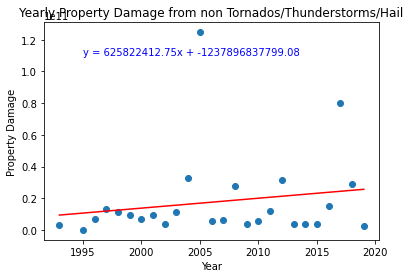

In [25]:
yearly_df = data2.groupby('YEAR')
years =yearly_df['YEAR'].unique()
pdamage = yearly_df['CPIAdjPrice'].sum()
#cdamage = yearly_df.CROPADJ.array

plt.scatter(years, pdamage)
(slope, intercept, rvalue, pvalue, stderr) = linregress(years.astype(float), pdamage)
regress_values = years * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(1995,110000000000),fontsize=10,color="blue")
#plt.plot(x_axis,regress_values,"r-")
plt.plot(years, intercept + slope*years, 'r', label='fitted line')

plt.xlabel("Year") 
plt.ylabel("Property Damage") 
plt.title("Yearly Property Damage from non Tornados/Thunderstorms/Hail") 
plt.show()

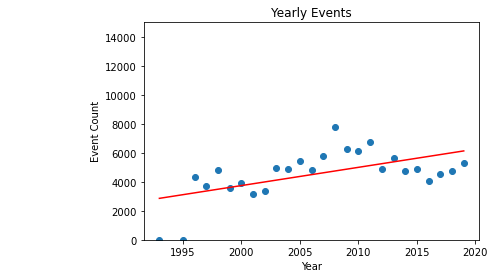

In [31]:
yearly_df = data2.groupby('YEAR')
years =yearly_df['YEAR'].unique()
pdamage = yearly_df['EVENT_TYPE'].count()
#cdamage = yearly_df.CROPADJ.array

plt.scatter(years, pdamage)
(slope, intercept, rvalue, pvalue, stderr) = linregress(years.astype(float), pdamage)
regress_values = years * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(1980,1),fontsize=10,color="blue")
#plt.plot(x_axis,regress_values,"r-")
plt.plot(years, intercept + slope*years, 'r', label='fitted line')
plt.ylim(0,15000)
plt.xlabel("Year") 
plt.ylabel("Event Count") 
plt.title("Yearly Events") 
plt.show()